Summary Statistics:
               age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000  

Mean:
 age          53.510870
trestbps    132.132404
chol        199

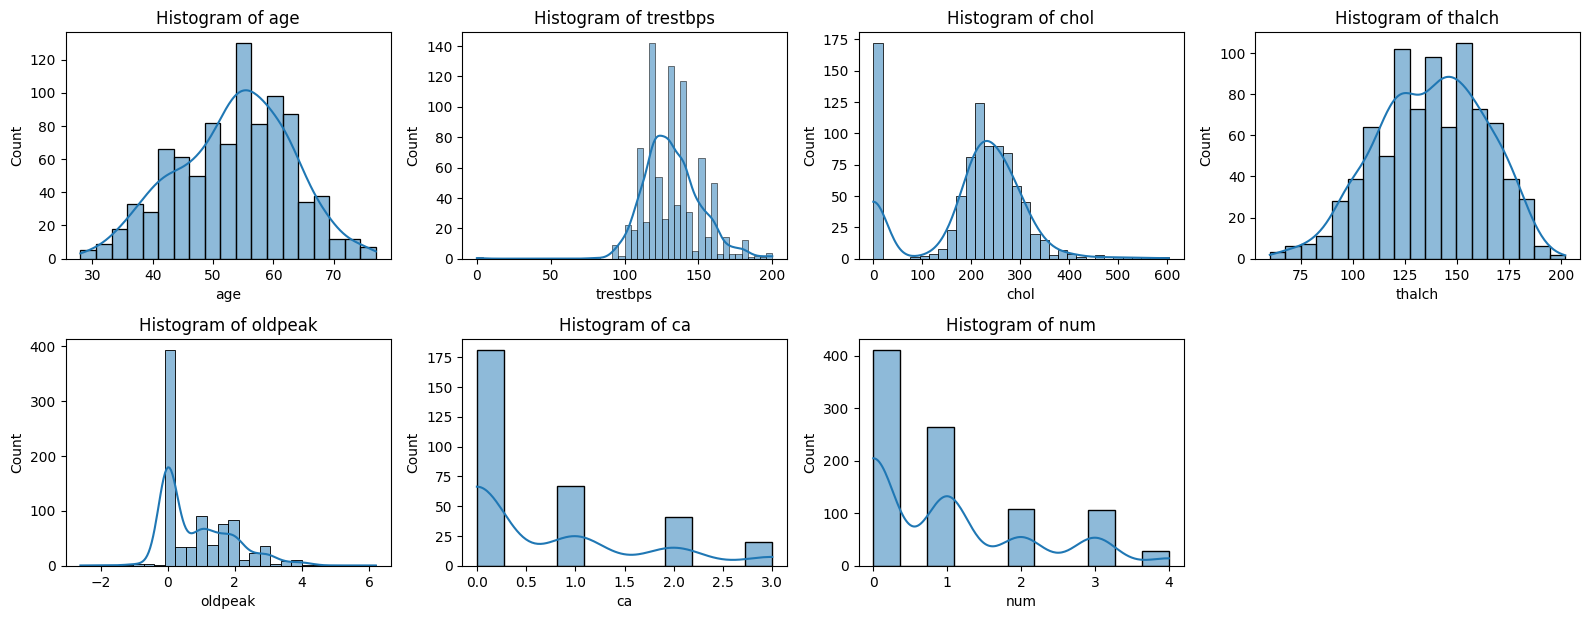

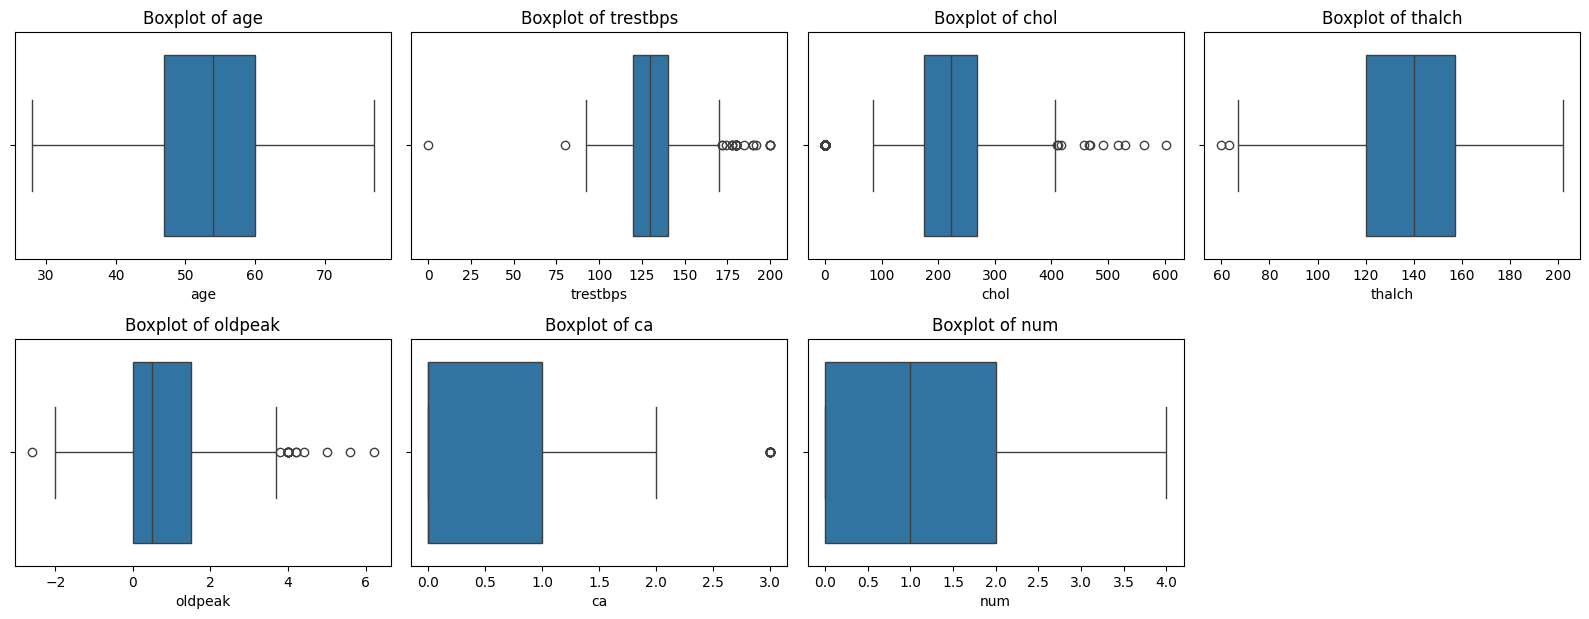

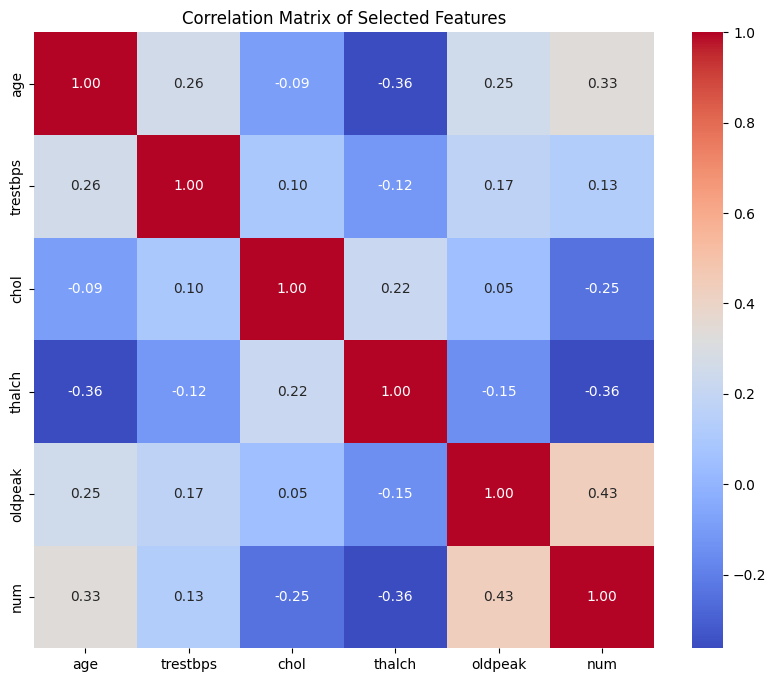

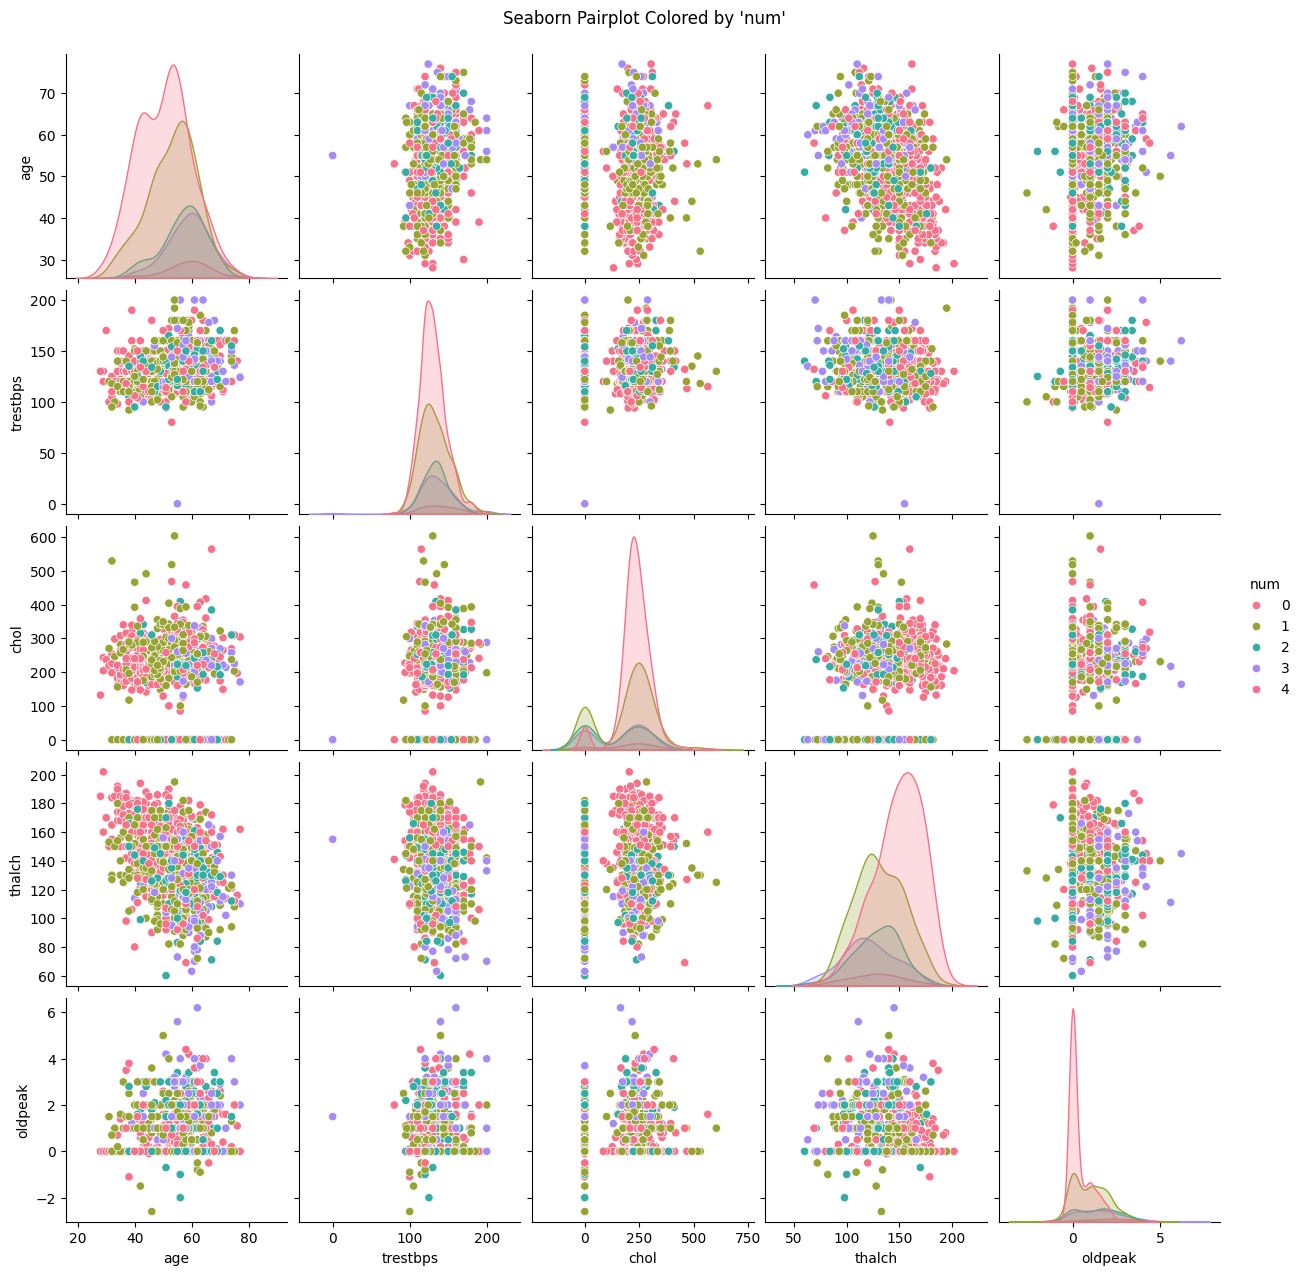

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("heart_disease_uci.csv")

# Select only numeric features (excluding 'id')
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=["id"], errors='ignore')

# Display summary statistics
print("Summary Statistics:\n", numeric_df.describe())
print("\nMean:\n", numeric_df.mean())
print("\nMedian:\n", numeric_df.median())
print("\nStandard Deviation:\n", numeric_df.std())

# Histograms
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(numeric_df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=numeric_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Cleaned subset for correlations and pairplot
selected_features = ["age", "trestbps", "chol", "thalch", "oldpeak", "num"]
df_cleaned = df[selected_features].dropna()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# Pairplot
sns.pairplot(df_cleaned, hue="num", palette="husl")
plt.suptitle("Seaborn Pairplot Colored by 'num'", y=1.02)
plt.show()

# Interactive scatter matrix using Plotly
fig = px.scatter_matrix(df_cleaned,
                        dimensions=selected_features[:-1],  # Exclude 'num' from axes
                        color=df_cleaned["num"].astype(str),
                        title="Plotly Scatter Matrix of Selected Features",
                        labels={col: col for col in selected_features})
fig.update_traces(diagonal_visible=False)
fig.show()
